In [71]:
import pandas             as pd
import numpy              as np
import pylab              as pl
from   scipy.spatial      import Delaunay
from   scipy.spatial      import KDTree
from   astropy.table      import Table

In [72]:
params = {'legend.fontsize': '20',
          'figure.figsize': (10, 10),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20'}
pl.rcParams.update(params)

##  Example with Random Point

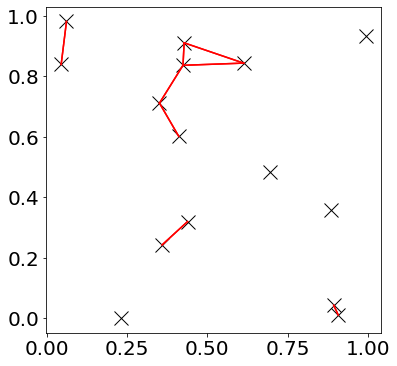

In [73]:
import matplotlib.pyplot as plt

import numpy as np

from scipy.spatial import KDTree

rng = np.random.default_rng()

points1 = rng.random((15, 2))

plt.figure(figsize=(6, 6))

plt.plot(points1[:, 0], points1[:, 1], "xk", markersize=14)

kd_tree1 = KDTree(points1)

indexes = kd_tree1.query_ball_tree(kd_tree1, r=0.2)

for i in range(len(indexes)):
    for j in indexes[i]:
        plt.plot([points1[i, 0], points1[j, 0]],[points1[i, 1], points1[j, 1]], "-r")
plt.show()

In [74]:
kdtree_02 = np.array([ np.array([i, len(i)], dtype=object)  for i in indexes])

In [75]:
ii_0_simplex = np.where(kdtree_02[:,1] == 1)[0]
len(ii_0_simplex)
ii_1_simplex = np.where(kdtree_02[:,1] == 2)[0]
len(ii_1_simplex)

7

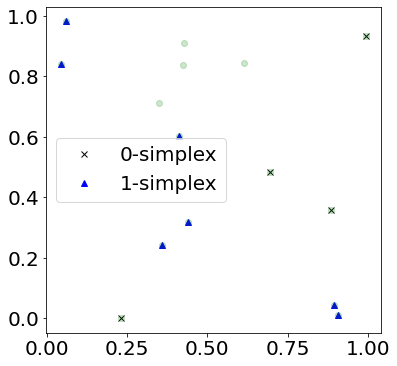

In [76]:
plt.figure(figsize=(6, 6))
pl.plot(points1[ii_0_simplex][:,0], points1[ii_0_simplex][:,1], 'xk', label='0-simplex')
pl.plot(points1[ii_1_simplex][:,0], points1[ii_1_simplex][:,1], '^b', label='1-simplex')
pl.plot(points1[:,0], points1[:,1], 'og', alpha=0.2)
pl.legend()
pl.show()

## On the GAMA G15

In [77]:
data = Table.read('./data/gama_gold_ddp.fits')

In [78]:
rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
df_pos = data[rot_xyz_labels].to_pandas()
rot_xyz = np.array(df_pos)

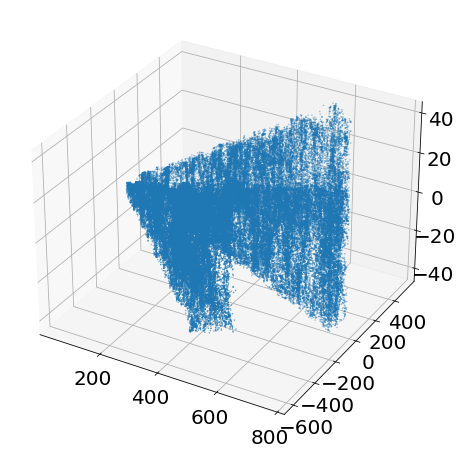

In [79]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz[:,0], rot_xyz[:,1], rot_xyz[:,2], s=0.2)

In [80]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'
ii_G15

array([False, False,  True, ..., False,  True, False])

In [81]:
DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 
df_pos_DDP1 = df_pos[ii_DDP1 & ii_G15]
rot_xyz_ddp1 = rot_xyz[ii_DDP1 & ii_G15]

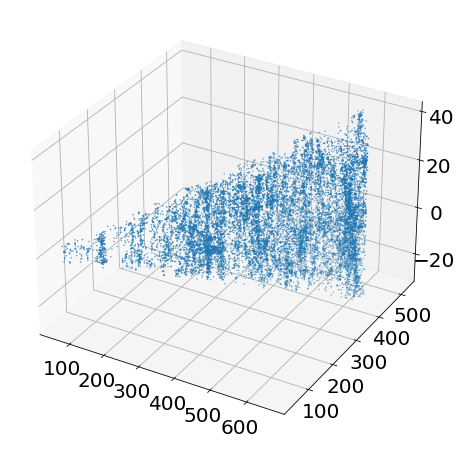

In [82]:
fig = pl.figure(figsize=(8,8), rasterized=True)
ax = pl.axes(projection='3d')
ax.scatter3D(rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2], s=0.2)

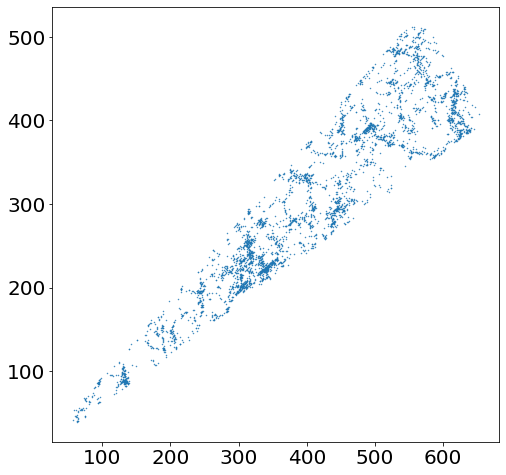

In [83]:
fig = pl.figure(figsize=(8,8), rasterized=True)
is_slice = (rot_xyz_ddp1[:,2]>-5) & (rot_xyz_ddp1[:,2]<5)
pl.scatter(rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice], s=0.2)

## For a Slice

In [84]:
# test_pos = np.c_[rot_xyz_ddp1[:,0][is_slice], rot_xyz_ddp1[:,1][is_slice]]
test_pos = np.c_[rot_xyz_ddp1[:,0], rot_xyz_ddp1[:,1], rot_xyz_ddp1[:,2]]
test_pos

array([[376.36105118, 259.70302003, -14.42712499],
       [609.59390937, 452.94733324, -16.32459968],
       [378.18944337, 337.25036104,  24.24783173],
       ...,
       [358.78372749, 226.70063623,   8.86237929],
       [636.72503039, 393.19411962, -22.70611169],
       [395.10984945, 333.19191631,   3.53798524]])

In [85]:
kd_tree_all  = KDTree(test_pos)
kd_tree_all

In [86]:
indexes_dat = kd_tree_all.query_ball_tree(kd_tree_all, r=8.)

In [87]:
kdtree_8 = np.array([ np.array([i, len(i)], dtype=object)  for i in indexes_dat])

## 0-Neigbours r<8Mpc

In [88]:
ii_0_simplex = np.where(kdtree_8[:,1] == 1)[0]
len(ii_0_simplex)

63

In [164]:
# np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_0neig.txt', np.c_[np.arange(len(ii_0_simplex)),test_pos[ii_0_simplex][:,0],test_pos[ii_0_simplex][:,1]] , fmt='%d %f %f', header='id px py')
np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_0neig_3d.txt', np.c_[np.arange(len(ii_0_simplex)),test_pos[ii_0_simplex][:,0],test_pos[ii_0_simplex][:,1],test_pos[ii_0_simplex][:,2]] , fmt='%d %f %f %f', header='id px py pz')

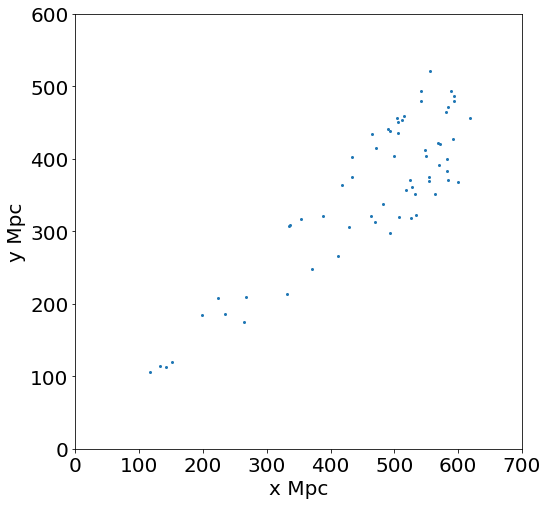

In [165]:
fig = plt.figure(figsize=(8,8))
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=4)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.xlim(0,700)
pl.ylim(0,600)
pl.show()

5


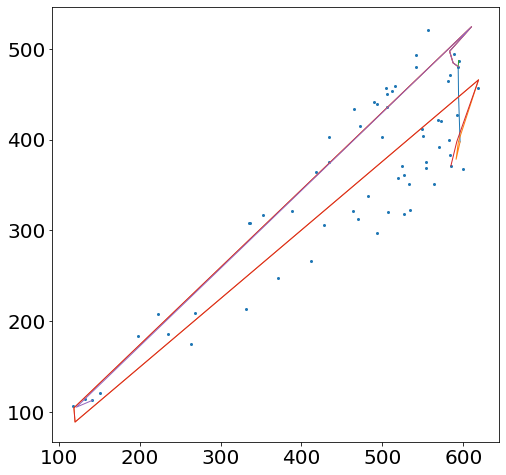

In [169]:
f = open('./data/GAMA_rotpos_ddp1_gr15_slice_0neig_3d.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
print(N_fila)
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=4)

## 1-Neigbours r<8Mpc

In [149]:
ii_1_simplex = np.where(kdtree_8[:,1] == 2)[0]
len(ii_1_simplex)

157

In [166]:
# np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_1neig.txt', np.c_[np.arange(len(ii_1_simplex)),test_pos[ii_1_simplex][:,0],test_pos[ii_1_simplex][:,1]] , fmt='%d %f %f', header='id px py')
np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_1neig_3d.txt', np.c_[np.arange(len(ii_1_simplex)),test_pos[ii_1_simplex][:,0],test_pos[ii_1_simplex][:,1],test_pos[ii_1_simplex][:,2]] , fmt='%d %f %f %f', header='id px py pz')

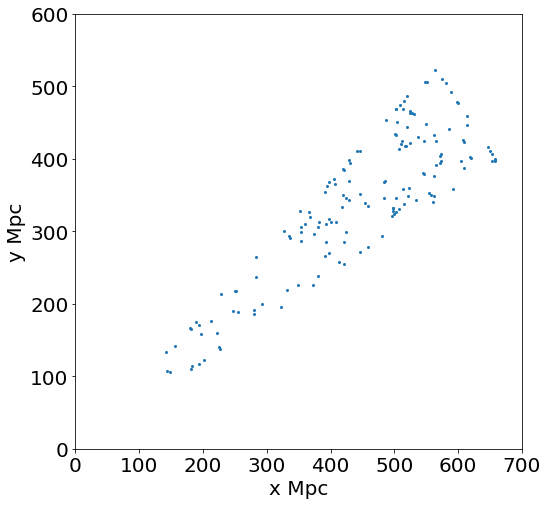

In [150]:
fig = plt.figure(figsize=(8,8))
pl.scatter(test_pos[ii_1_simplex][:,0], test_pos[ii_1_simplex][:,1], s=4)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.xlim(0,700)
pl.ylim(0,600)
pl.show()

7


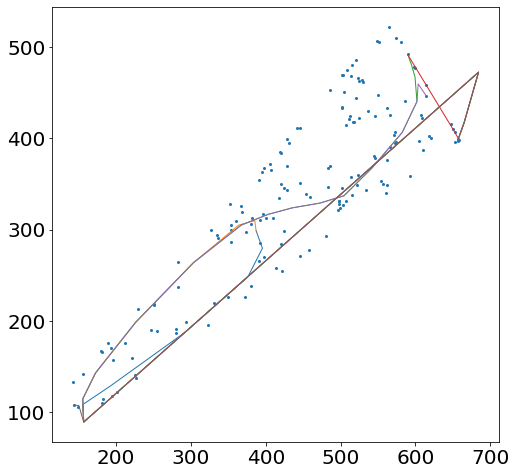

In [170]:
f = open('./data/GAMA_rotpos_ddp1_gr15_slice_1neig_3d.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
print(N_fila)
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.scatter(test_pos[ii_1_simplex][:,0], test_pos[ii_1_simplex][:,1], s=4)

## 2-Neigbours r<8Mpc

In [120]:
ii_2_simplex = np.where(kdtree_8[:,1] == 3)[0]
len(ii_2_simplex)

178

In [167]:
# np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_2neig.txt', np.c_[np.arange(len(ii_2_simplex)),test_pos[ii_2_simplex][:,0],test_pos[ii_2_simplex][:,1]] , fmt='%d %f %f', header='id px py')
np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_2neig_3d.txt', np.c_[np.arange(len(ii_2_simplex)),test_pos[ii_2_simplex][:,0],test_pos[ii_2_simplex][:,1],test_pos[ii_2_simplex][:,2]] , fmt='%d %f %f %f', header='id px py pz')

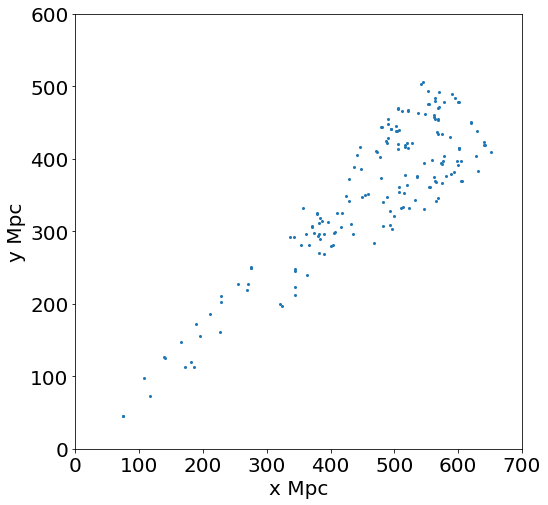

In [153]:
fig = plt.figure(figsize=(8,8))
pl.scatter(test_pos[ii_2_simplex][:,0], test_pos[ii_2_simplex][:,1], s=4)
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.xlim(0,700)
pl.ylim(0,600)
pl.show()

2


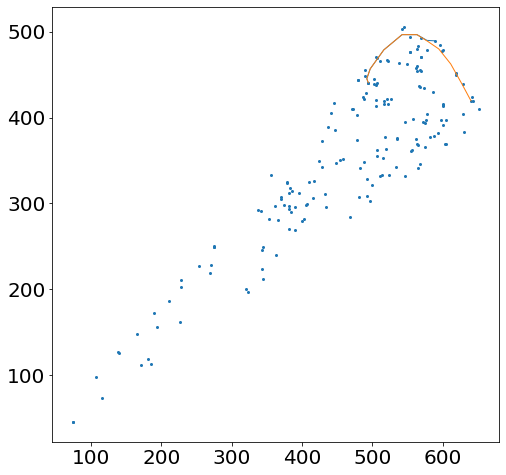

In [171]:
f = open('./data/GAMA_rotpos_ddp1_gr15_slice_2neig_3d.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
print(N_fila)
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(8,8), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.scatter(test_pos[ii_2_simplex][:,0], test_pos[ii_2_simplex][:,1], s=4)

## 012-Neigbours r<8Mpc

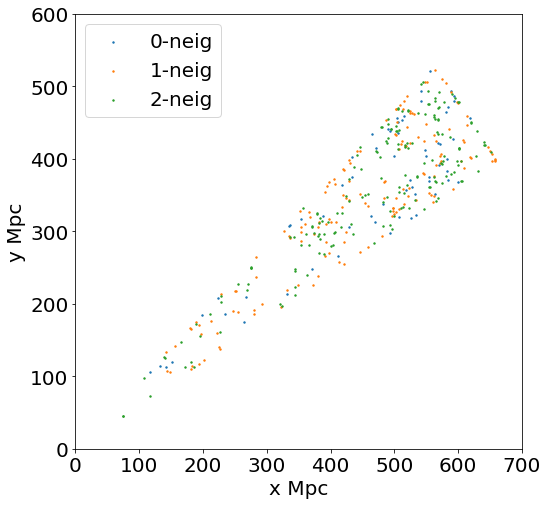

In [155]:
fig,_ = pl.subplots(figsize=(8,8))
pl.xlabel('x Mpc')
pl.ylabel('y Mpc')
pl.xlim(0,700)
pl.ylim(0,600)
pl.scatter(test_pos[ii_0_simplex][:,0], test_pos[ii_0_simplex][:,1], s=2, label='0-neig')
pl.scatter(test_pos[ii_1_simplex][:,0], test_pos[ii_1_simplex][:,1], s=2, label='1-neig')
pl.scatter(test_pos[ii_2_simplex][:,0], test_pos[ii_2_simplex][:,1], s=2, label='2-neig')
pl.legend()
pl.show()

10


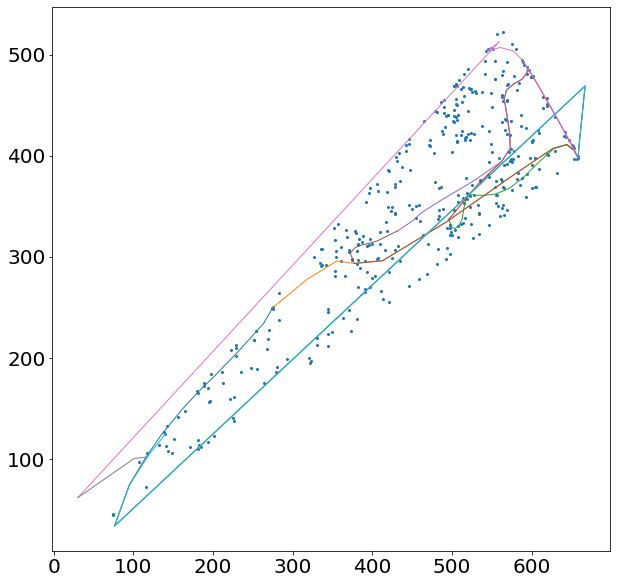

In [172]:
f = open('./data/GAMA_rotpos_ddp1_gr15_slice_012neig_3d.txt.NDnet_s3.5.up.NDskl.S001.a.NDskl')
doc = f.readlines()
doc = np.array(doc)
ii = np.where(doc=='[FILAMENTS]\n')[0][0]
N_fila = int(doc[ii+1])
print(N_fila)
FILA = np.zeros(N_fila, dtype=object)
jj = ii+2
# print(doc[jj][0].replace('\n','').split(' ')[2])
fig = pl.figure(figsize=(10,10), rasterized=True)
for i in range(N_fila):
    jj_new = jj + int(doc[jj].replace('\n','').split(' ')[2]) + 1
    FILA[i] = np.array([a.replace('\n','').split(' ')[1:] for a in doc[jj+1:jj_new]], dtype=float)
    pl.plot(FILA[i][:,0], FILA[i][:,1], lw=1) 
    jj = jj_new
pl.scatter(test_pos[ii_012_simplex][:,0], test_pos[ii_012_simplex][:,1], s=4)

In [158]:
ii_012_simplex = np.concatenate([ii_0_simplex, ii_1_simplex, ii_2_simplex])
ii_012_simplex

array([  265,   411,   445,   563,   733,   806,   916,  1022,  1025,
        1168,  1306,  1335,  2142,  2746,  3142,  3343,  3364,  3380,
        3666,  4062,  4199,  4426,  4442,  4530,  4726,  4908,  5225,
        5878,  6413,  6571,  6727,  6761,  7663,  7888,  8034,  8226,
        8342,  8738,  9010,  9245,  9280,  9749, 10122, 11065, 11624,
       11756, 12191, 13014, 13044, 13119, 13316, 13406, 13482, 13558,
       13731, 13805, 14079, 14297, 14382, 14565, 14806, 15598, 16270,
         130,   485,   502,   672,   744,   773,   869,   927,   991,
        1024,  1241,  1299,  1369,  1403,  1417,  1441,  1597,  1628,
        1760,  1892,  1903,  1998,  2032,  2095,  2221,  2228,  2337,
        2430,  2437,  3017,  3173,  3190,  3282,  3332,  3606,  3687,
        3743,  3773,  3860,  4021,  4133,  4154,  4183,  4206,  4448,
        4681,  4899,  4990,  5028,  5053,  5156,  5194,  5461,  5489,
        5660,  5747,  5848,  5883,  5930,  6423,  6534,  6609,  6671,
        6710,  7059,

In [168]:
# np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_012neig.txt', np.c_[np.arange(len(ii_012_simplex)),test_pos[ii_012_simplex][:,0],test_pos[ii_012_simplex][:,1]] , fmt='%d %f %f', header='id px py')
np.savetxt('./data/GAMA_rotpos_ddp1_gr15_slice_012neig_3d.txt', np.c_[np.arange(len(ii_012_simplex)),test_pos[ii_012_simplex][:,0],test_pos[ii_012_simplex][:,1],test_pos[ii_012_simplex][:,2]] , fmt='%d %f %f %f', header='id px py pz')

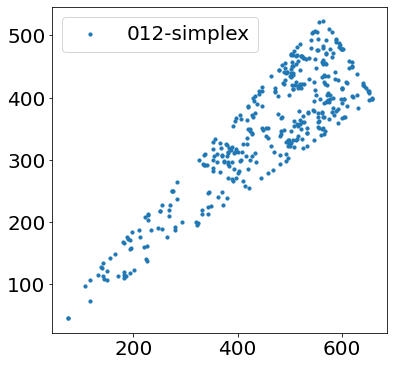

In [124]:
fig,_ = pl.subplots(figsize=(6,6))
# ax = pl.axes(projection='3d')
pl.scatter(test_pos[ii_012_simplex][:,0], test_pos[ii_012_simplex][:,1], s=10, label='012-simplex')
pl.legend()
pl.show()